# Bagging with scikit-learn

Bagging is an ensemble method that focuses on the manipulation of the training data. When bagging, we sample, with replacement, $m$ subsets of the training data, each of $n$ size. We train a model on each of these subsets; when predicting, we then feed the data point through each of the $m$ models we've created, taking the average of them if the model is a regressor, and the majority vote of them if the model is a classifier.

Using bagging allows us to reduce overfitting in our model; however, there is a catch. Bagging tends to work better with models that are *unstable*, such as decision trees. Models that tend not to change as much with available data, such as KNN, will not see much benefit from bagging.

### Using Bagging

Scikit-learn provides two main methods for using bagging: BaggingClassifier and BaggingRegressor. We'll start by taking a look at our dataset, which consists and Fire and Electric type pokemon.

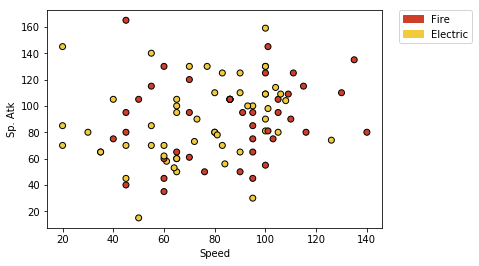

Basline:  0.541666666667


In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors as ne
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

poke = pd.read_csv("./Pokemon.csv")
poke['TN'] = poke['Type 1'].astype('category').cat.codes
type_mask = poke['Type 1'].isin(['Fire','Electric'])
type_num = {'Fire':0, 'Electric':1}
EorF = poke[type_mask]

xcol = ['Speed', 'Sp. Atk']
ycol = 'TN'

cmb = ListedColormap(['#cf3e28', '#f2cb3a'])

plt.figure()

plt.scatter(EorF['Speed'].as_matrix(), EorF['Sp. Atk'].as_matrix(), c=EorF[ycol], cmap=cmb, edgecolor='black', label=ycol)

plt.xlabel("Speed")
plt.ylabel("Sp. Atk")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[mpatches.Patch(color='#cf3e28', label="Fire"),
                                                                      mpatches.Patch(color='#f2cb3a', label="Electric")])

plt.show()

print("Basline: ", EorF[ycol].value_counts().iloc[0] / EorF[ycol].shape[0])

Next, we'll see how a single decision tree does at predicting the type.

In [16]:
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(EorF[['Speed', 'Sp. Atk']], EorF[ycol],
                                                    test_size=0.33, random_state=151)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print("Prediction Accuracy: ", np.equal(preds, y_test).sum() / preds.shape[0])

Prediction Accuracy:  0.53125


Ouch, didn't even meet the baseline...that stings. Rather than trying something else immediately, why don't we first give bagging a try?

In [39]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging model of 5 models which each hold 1% of the data
bag = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=5, max_samples=.1)
bag.fit(X_train, y_train)

preds = bag.predict(X_test)

print("Prediction Accuracy: ", np.equal(preds, y_test).sum() / preds.shape[0])

Prediction Accuracy:  0.59375


And we managed to get 6% higher accuracy, beating the baseline (slightly). Now, in reality, you'd certainly want to use something other than a decision tree for this problem; however, I do hope this example has shown you how to use a bagging model, and that it can lead to increased performance on our testing data.